# Hyperoptimization

In this tutorial, we show how to optimize the parameters of an RNN regression model with the deep4cast package. We will use temporal (causal) cross-validation (also known as backtesting) to evaluate the model. The example data constitutes of a monthly 26-dimensional multivariate time series.

In [1]:
import numpy as np

import matplotlib.pyplot as plt

from deep4cast.forecasters import Forecaster
from deep4cast.validators import TemporalCrossValidator
from deep4cast.optimizers import HyperOptimizer
from pandas import read_table

%matplotlib inline

Using CNTK backend


## Data preparation

Before we can fit a model we first have to load, clean, and prepare our dataset so that the model can accept it.

In [4]:
# Load the data from file
filename = 'timeseries_data.csv'
df = read_table(filename, sep=',')

# Prepare the data set
data = df.astype('float32').values
data = np.expand_dims(data, axis=-1)

Before we do anything, we visualize the data.

Text(0,0.5,'Quantity')

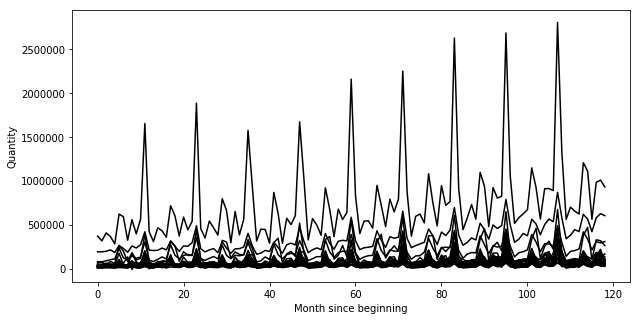

In [5]:
# Plot dataset
plt.figure(figsize=(10,5))
plt.plot(ts[:,:,0], 'k')
plt.xlabel('Month since beginning')
plt.ylabel('Quantity')

## Hyperoptimization

Now that we have cleaned and prepared out dataset we can proceed to optimize one of our built-in regression models. Here, we choose the LSTM-RNN. The optmizer is initalized with
* a topology object,
* a forecaster,
* a data_set to train and validate on
* a parameter domain

In [16]:
# Define the topology of the Neural Network
topology = [
    {
        'meta': {
            'layer_type': 'AutoRegression',
            'layer_id': 'ar1',
            'parent_ids': ['input']
        },
        'params': {}
    }
]

# Define the forecaster parameters
params = {
    'topology': topology, 
    'optimizer': 'adam',
    'lag': 10, 
    'horizon': 1, 
    'batch_size': 10, 
    'epochs': 50,
    'lr': 0.01, 
    'uncertainty': False
}

# Define the parameter domain the optimizer will use
domain = {
        'forecaster': {
            'lag': (5, 50),
            'epochs': (50, 250)
        },
        'topology': {},
        'optimizer': {
            'lr': (-7, -1)
        }
}

# Define the forecaster and set the random number generator seed for repoducible experiments
forecaster = Forecaster(**params)
forecaster.seed = 3

# Optimize the forecaster
optimizer = HyperOptimizer(forecaster, data, domain, n_iter=50, train_frac=0.9, n_folds=1, loss='mape')

Now we can perform hyper-optmization

In [17]:
best_values, trials = optimizer.fit()

IndexError: list index out of range

Let's have a look at the cross-validation scores

In [13]:
# Remove nan's from losses
losses = np.array(trials.losses())
losses = losses[np.isfinite(losses)]

# Show bet values
best_values, min(losses)

({'epochs': 208.0,
  'lag': 19.0,
  'lr': 0.0020723703198935904,
  'lstm1_units': 19.0},
 16.36)